In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import re

In [2]:
# Connessione al database SQL
conn = sqlite3.connect('database.db')
query_Y = "SELECT * FROM Y"  
Y = pd.read_sql_query(query_Y, conn)
query_Q = "SELECT * FROM Q"
Q = pd.read_sql_query(query_Q, conn)
query_X = "SELECT * FROM X"
X = pd.read_sql_query(query_X, conn)
# Chiusura della connessione
conn.close()

In [3]:
# Funzione per modificare la colonna 'th_names'
def modify_th_names(th_name):
    # Aggiungere uno 0 tra 'h' e una cifra se dopo la lettera 'h' c'è solo una cifra prima di '-'
    th_name = re.sub(r'(h)(\d)(-)', r'\g<1>0\g<2>\g<3>', th_name)
    
    # Aggiungere uno 0 al penultimo posto se la stringa non finisce con '10'
    if not th_name.endswith('10'):
        th_name = th_name[:-1] + '0' + th_name[-1]
    
    return th_name

In [4]:
Y['th_names'] = Y['th_names'].apply(modify_th_names)
Q['th_names'] = Q['th_names'].apply(modify_th_names)
X['th_names'] = X['th_names'].apply(modify_th_names)

In [5]:
# Raggruppamento dei dati per 'n_names'
Y_filtered = Y[Y['n_names'] == 'EE']
Y_filtered=Y_filtered.iloc[:-1]
Q_filtered = Q[Q['n_names'] == 'EE']
Q_filtered=Q_filtered.iloc[:-1]
X_hw_filtered = X[X['a_names'] == 'HP heating winter']
X_hw_filtered=X_hw_filtered.iloc[:-1]

In [7]:
X_filtered=X_hw_filtered.copy()
X_filtered['values'] = X_hw_filtered['values']*0.5

In [8]:
#Suddivisione in mesi
Y_filtered.loc[:,'season']=Y_filtered['th_names'].str[-4:-2]
Y_filtered['hour'] = Y_filtered['th_names'].str[1:3].astype(int)
Y_filtered['day'] = Y_filtered['th_names'].str[-2:].astype(int)
Y_filtered['time'] = (Y_filtered['day'] - 1) * 24 + Y_filtered['hour']

Q_filtered.loc[:,'season']=Q_filtered['th_names'].str[-4:-2]
Q_filtered['hour'] = Q_filtered['th_names'].str[1:3].astype(int)
Q_filtered['day'] = Q_filtered['th_names'].str[-2:].astype(int)
Q_filtered['time'] = (Q_filtered['day'] - 1) * 24 + Q_filtered['hour']

X_filtered.loc[:,'season']=X_filtered['th_names'].str[-4:-2]
X_filtered['hour'] = X_filtered['th_names'].str[1:3].astype(int)
X_filtered['day'] = X_filtered['th_names'].str[-2:].astype(int)
X_filtered['time'] = (X_filtered['day'] - 1) * 24 + X_filtered['hour']

In [61]:
Yh_filtered = Y[Y['n_names'] == 'Heat']
Yh_filtered=Yh_filtered.iloc[:-1]
Yh_filtered.loc[:,'season']=Yh_filtered['th_names'].str[-4:-2]
Yh_filtered['hour'] = Yh_filtered['th_names'].str[1:3].astype(int)
Yh_filtered['day'] = Yh_filtered['th_names'].str[-2:].astype(int)
Yh_filtered['time'] = (Yh_filtered['day'] - 1) * 24 + Yh_filtered['hour']

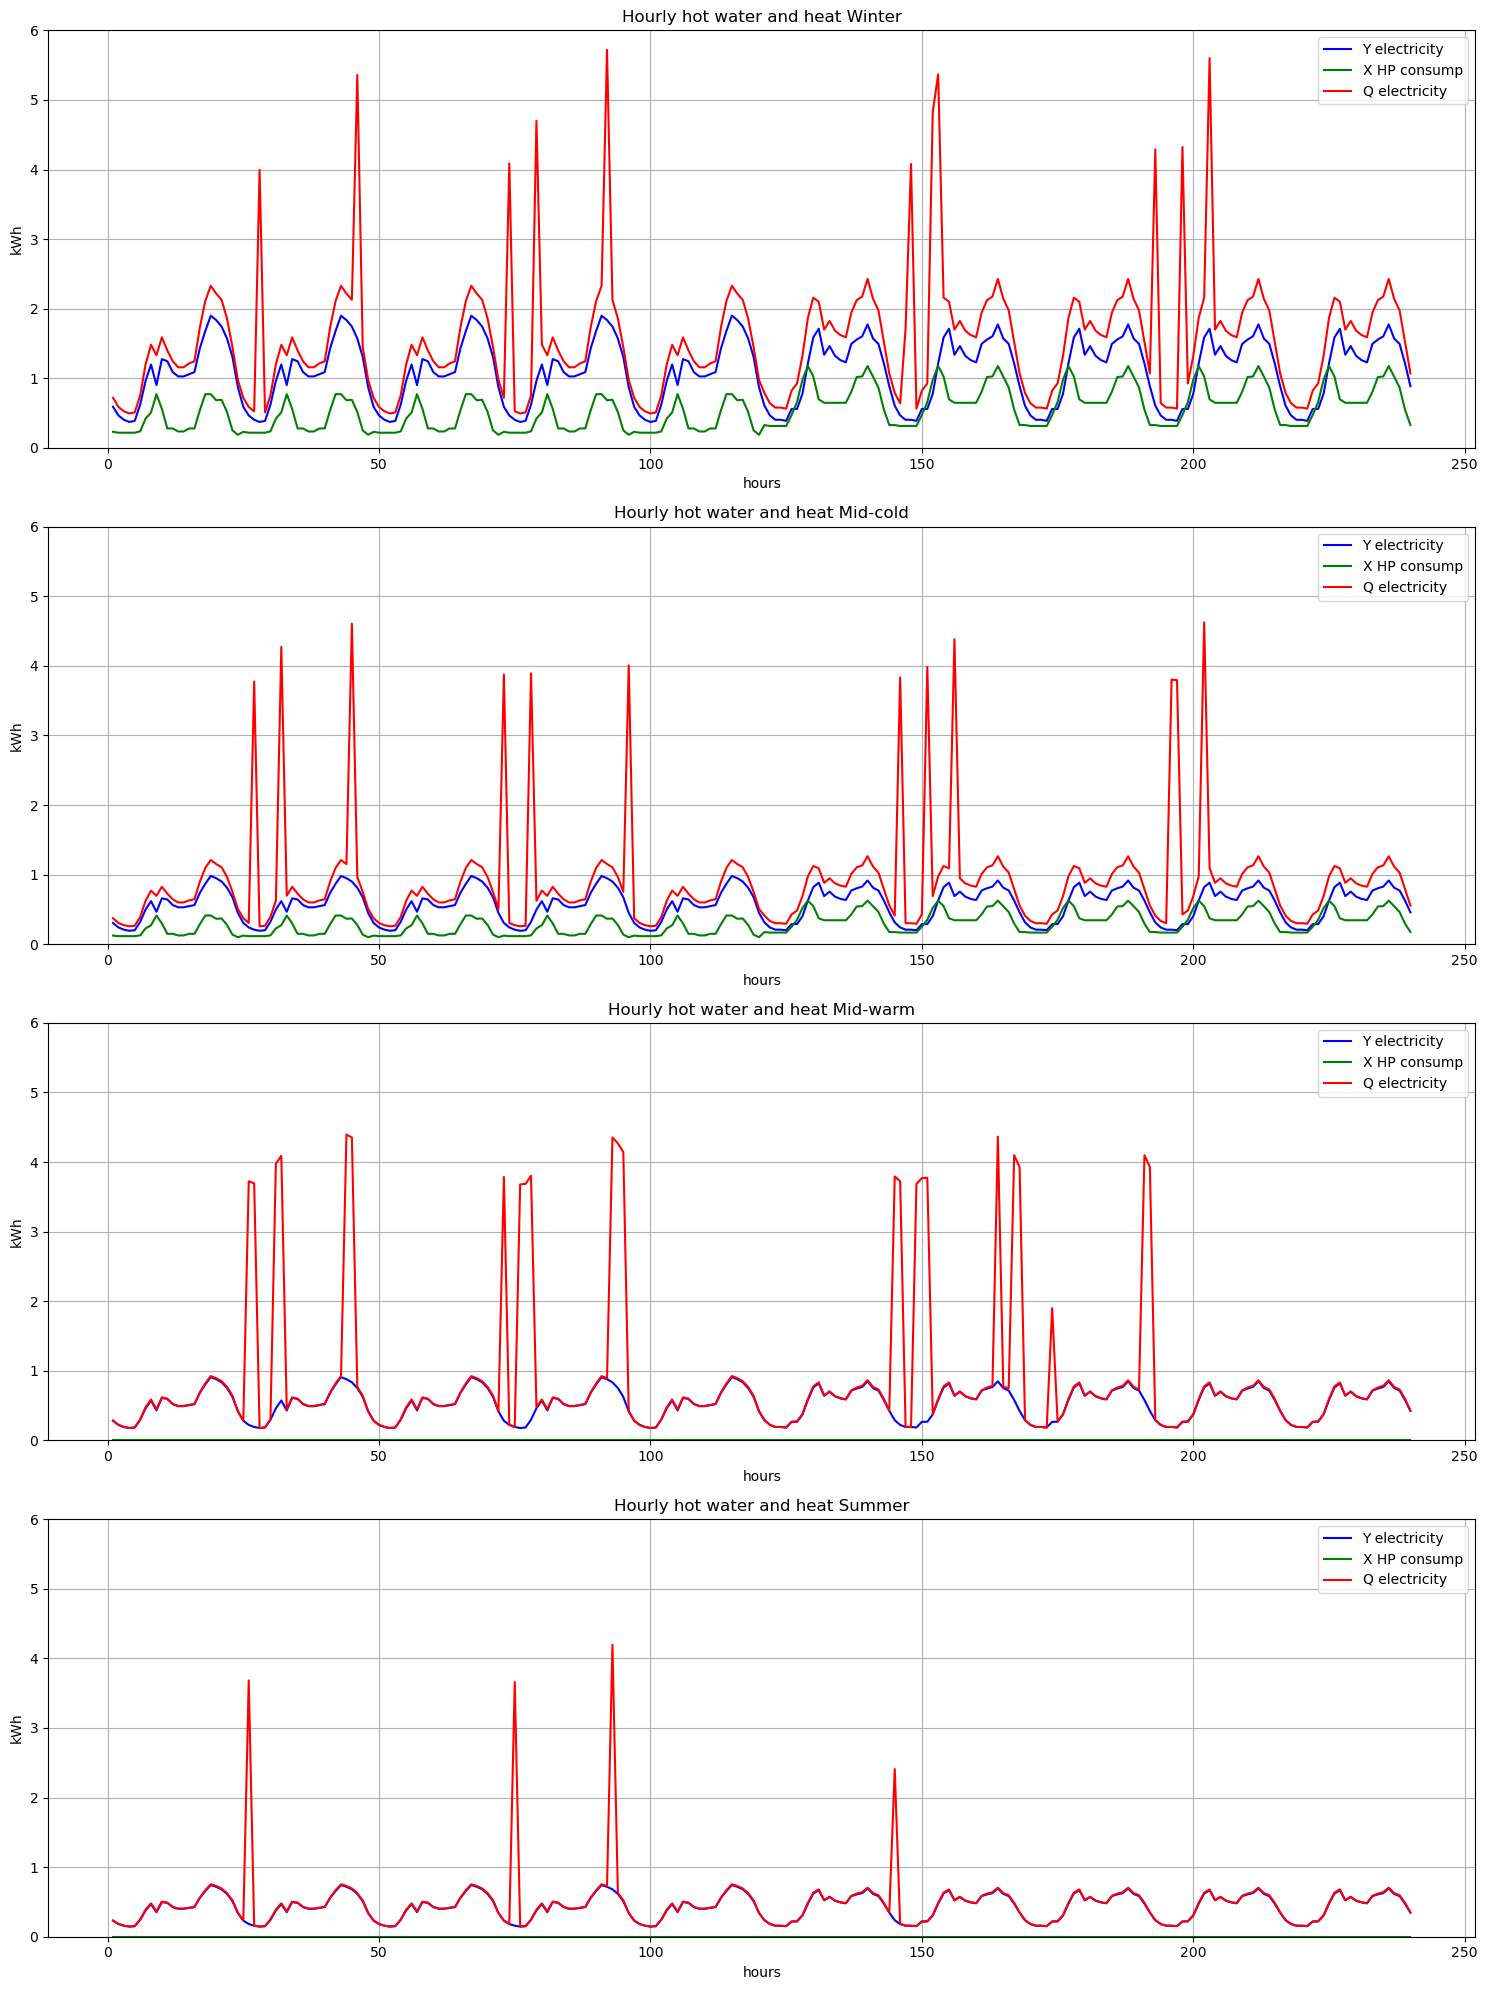

In [10]:
seasons = ['wi', 'mc', 'mw', 'su']
season_names = {'wi': 'Winter', 'mc': 'Mid-cold', 'mw': 'Mid-warm', 'su': 'Summer'}
# Creazione del grafico
plt.figure(figsize=(15, 20))

for i, season in enumerate(seasons, 1):
    Y_season = Y_filtered[Y_filtered['season'] == season]
    X_season = X_filtered[X_filtered['season'] == season]
    Q_season = Q_filtered[Q_filtered['season'] == season]
    
    plt.subplot(4, 1, i)
    plt.plot(Y_season['time'], Y_season['values'], label='Y electricity', color='blue')
    plt.plot(X_season['time'], X_season['values'], label='X HP consump', color='green')
    plt.plot(Q_season['time'], Q_season['values'], label='Q electricity', color='red')
    plt.xlabel('hours')
    plt.ylabel('kWh')
    plt.ylim(0,6)
    plt.title(f'Hourly hot water and heat {season_names[season]}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

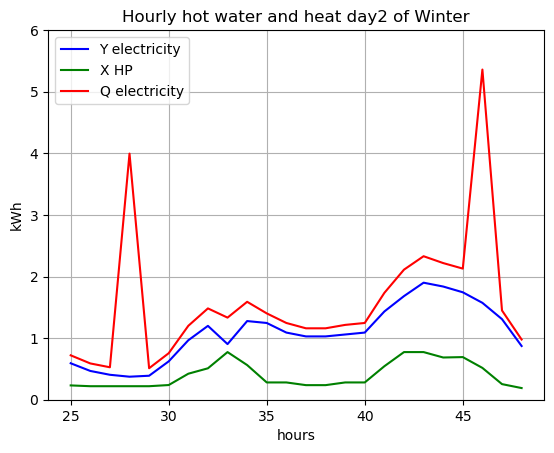

In [11]:
Y_day1 = Y_filtered[(Y_filtered['day'] == 2) & (Y_filtered['season'] == 'wi')]
Q_day1 = Q_filtered[(Q_filtered['day'] == 2) & (Q_filtered['season'] == 'wi')]
X_day1 = X_filtered[(X_filtered['day'] == 2) & (X_filtered['season'] == 'wi')]

plt.plot(Y_day1['time'], Y_day1['values'], label='Y electricity', color='blue')
plt.plot(X_day1['time'], X_day1['values'], label='X HP', color='green')
plt.plot(Q_day1['time'], Q_day1['values'], label='Q electricity', color='red')
plt.xlabel('hours')
plt.ylabel('kWh')
plt.ylim(0,6)
plt.title(f'Hourly hot water and heat day2 of Winter')
plt.legend()
plt.grid(True)

plt.show()